# Part 1: Minimum-Tracking-Error Frontier

Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:

Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

Calculate the information ratio and portfolio weights for the "tangency" portfolio

### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

### Import and read file path and create dataframe for industry and market portfolio. Create deviation data frame

In [2]:
# Create a list of file paths
file_paths = ['Industry_Portfolios.csv',\
              'Risk_Factors.csv',\
              'Market_Portfolio.csv']

# Create a dictionary to store DataFrames
dataframes = {}

# Loop through the file paths and read CSV files
for file_path in file_paths:
    # Extract the file name without the extension as the DataFrame key
    file_name = file_path.split('.')[0]
    df = pd.read_csv(file_path)
    dataframes[file_name] = df
    
# Create data frame for industry, market, and deviation between industry-market mean return.  
data_frame_industry = dataframes['Industry_Portfolios']
data_frame_market = dataframes['Market_Portfolio']
data_frame_deviation = data_frame_industry - data_frame_market 

In [3]:
# Calculate mean of industry return
industry_mean = data_frame_industry.drop('Date', axis=1).mean()

# Calculate covariance of industry return
industry_covariance = data_frame_industry.drop('Date', axis=1).cov()

# Extract market mean return
market_mean_return_df = data_frame_market.drop('Date', axis=1)


In [4]:
print("Industry Mean:")
print(industry_mean)

print("Industry Covariance Matrix:")
print(industry_covariance)

print("Market Mean Return:")
print(market_mean_return_df)

Industry Mean:
NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64
Industry Covariance Matrix:
           NoDur      Durbl      Manuf      Enrgy      HiTec      Telcm  \
NoDur  11.193422  18.449666  14.104907  10.531341  12.922949  11.968078   
Durbl  18.449666  69.920577  39.178097  27.019794  35.466652  27.490543   
Manuf  14.104907  39.178097  28.198970  23.145380  24.618739  19.550150   
Enrgy  10.531341  27.019794  23.145380  36.984933  19.267276  15.366817   
HiTec  12.922949  35.466652  24.618739  19.267276  28.957220  18.708273   
Telcm  11.968078  27.490543  19.550150  15.366817  18.708273  19.787227   
Shops  10.170832  27.444731  17.622867  11.297800  17.837115  14.169356   
Hlth    9.953112  16.824003  13.596447   9.630327  13.254064  11.506599   
Utils   7.866653  12.746136  11.440612  14.027168  10.304187  10.991596   
Other  14.43

## Calculate the Industry expected deviation by substracting Industry and Market mean return

In [5]:
def calculate_deviation(data_frame, data_frame_target, df_target_column_name):
    # Exclude the 'Date' column
    columns_to_subtract = data_frame.columns[1:]
    # Subtract the 'Rf' column from the selected columns
    deviation = data_frame[columns_to_subtract].sub(data_frame_target[df_target_column_name], axis=0)
    # Add the 'Date' column back to the result as the first column
    deviation.insert(0, 'Date', data_frame['Date'])
    return deviation

# Calculate excess return for industry
industry_expected_deviation = calculate_deviation(data_frame_industry, data_frame_market, 'Market')

# Drop "Date" column from the data_frame. Only remains return for each portfolio
selected_columns = industry_expected_deviation.drop('Date', axis=1)

# Extracts the names of the ten industry portfolios as a NumPy array
ten_industry_portfolios = selected_columns.columns.to_numpy()

# Calculate the mean return for each portfolio deviation
return_averages = selected_columns.mean()
# Calculate the standard deviation of return for each portfolio
std_dev_industry = selected_columns.std()
std_dev_industry_array = std_dev_industry.values
# Transpose the average returns to use for further calculations
R_transposed = return_averages.values
# Reshape the transposed average returns into a column vector
R = R_transposed.reshape(-1, 1)
# Calculate the covariance matrix for the selected columns
covariance_matrix_df = selected_columns.cov()
covariance_matrix = covariance_matrix_df.values
# Calculate the inverse of the covariance matrix
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
# Create a column vector of ones
e = np.ones((10, 1))
# Transpose the vector of ones
e_transposed = e.transpose()

# Calculate alpha, zeta, delta, and RMV (Risk-Adjusted Measures)
alpha = np.dot(np.dot(R_transposed, inverse_covariance_matrix), e)
zeta = np.dot(np.dot(R_transposed, inverse_covariance_matrix), R)
delta = np.dot(np.dot(e_transposed, inverse_covariance_matrix), e)
RMV = alpha / delta

## Checkprint data

In [6]:
# Print the deviation of the industry data frame from the market data frame
print("Industry Expected Deviation from Market (With Date):")
print(industry_expected_deviation)

# Print the selected columns (excluding 'Date') for the industry portfolio
print("Selected Columns for the Industry Portfolio:")
print(selected_columns)

# Print the list of ten industry portfolios
print("List of Ten Industry Portfolios:")
print(ten_industry_portfolios)

# Print the calculated statistics for the industry portfolio
print("\nMean Return for Each Portfolio:")
print(return_averages)

print("\nStandard Deviation of Return for Each Portfolio:")
print(std_dev_industry)

# Print the covariance matrix for the selected columns
print("\nCovariance Matrix for Selected Columns:")
print(covariance_matrix_df)

# Print the calculated financial metrics
print("\nAlpha:")
print(alpha)

print("\nZeta:")
print(zeta)

print("\nDelta:")
print(delta)

print("\nRMV (Risk-Adjusted Measure):")
print(RMV)


Industry Expected Deviation from Market (With Date):
       Date  NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  \
0    200401  -2.16  -3.29  -2.84  -1.78   2.31  -0.81  -1.77  0.87  -0.30   
1    200402   2.79  -1.53   0.49   3.23  -4.38  -1.98   4.63 -0.57   0.61   
2    200403   1.14   0.08   0.96   1.10  -1.32  -0.84   1.52 -2.73   2.36   
3    200404   3.17   4.05   1.58   4.27  -3.16   1.27  -0.95  5.29  -1.80   
4    200405  -3.12  -2.87   0.38  -0.84   3.62  -4.18  -0.93 -1.65   0.05   
..      ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
115  201308  -1.31   1.69   0.74   0.86   2.57  -0.59  -1.52 -0.80  -1.74   
116  201309  -1.82   2.70   1.44  -1.73   0.01   0.57   0.70  0.43  -2.71   
117  201310   0.58  -3.45   0.39   0.69  -0.37   1.35   0.91 -0.70  -0.82   
118  201311  -1.83  -1.31  -0.17  -2.27   0.53  -2.85   0.55  1.42  -4.93   
119  201312  -0.16  -1.63   0.32   0.14   1.23   1.15  -2.61 -2.10  -1.02   

     Other  
0     0.6

### Create a range of values for Rp from 0 to 0.1 with an interval of 0.005

In [7]:
Rp_range = np.arange(0, 0.105, 0.005).reshape(1, -1).flatten()


### Calculate the variance and standard deviation for each value of Rp using the formula provided in slide 13

In [8]:
variance = (1 / delta + (delta / (zeta * delta - alpha**2)) * (Rp_range - RMV)**2).flatten()
std_dev = np.sqrt(variance)

In [9]:
print(f"variance: {variance}\n")
print(f"std deviation: {std_dev}")

variance: [0.06038791 0.05217155 0.04481864 0.03832918 0.03270316 0.0279406
 0.02404147 0.0210058  0.01883357 0.01752479 0.01707945 0.01749756
 0.01877912 0.02092413 0.02393258 0.02780448 0.03253982 0.03813861
 0.04460085 0.05192653 0.06011566]

std deviation: [0.24573951 0.22841092 0.21170414 0.19577839 0.18084016 0.16715441
 0.15505313 0.14493377 0.13723545 0.13238122 0.13068838 0.13227836
 0.13703694 0.14465174 0.15470158 0.16674674 0.18038797 0.19529109
 0.21118913 0.22787394 0.24518496]


### Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [10]:
data = pd.DataFrame({
    'Industry_Portfolios': ten_industry_portfolios,
    'Mean Return': R_transposed,
    'Standard Deviation': std_dev_industry_array
}, index=range(1, 11))

# Use the `style` attribute to align text at the center
styled_data = data.style.set_properties(**{'text-align': 'center'})

styled_data

,Industry_Portfolios,Mean Return,Standard Deviation
1,NoDur,0.154750,2.332316
2,Durbl,-0.014750,5.160320
3,Manuf,0.264750,1.717702
4,Enrgy,0.483083,4.390320
5,HiTec,0.018167,2.258040
6,Telcm,0.133333,2.163924
7,Shops,0.168250,2.110125
8,Hlth,0.035750,2.796506
9,Utils,0.159083,3.502496
10,Other,-0.259000,2.122075


### Calculate the Sharpe ratio (slide 30) (in this case is information ratio) for the tangency portfolio, and also the tangency portfolio weights (slide 29) for the ten industry portfolios.

### In this code. Risk free rate is coded as 0% as for the minimum tracking error, we start from 0

In [11]:
# For information ratio, there is no Rf
Rf = 0
last_index_Rp = Rp_range[-1]
last_index_std_dev = std_dev[-1]
CAL_x_axis = np.array([0, last_index_std_dev])
information_ratio = ((zeta- 2*alpha*Rf + delta * Rf**2)**(1/2)).item()

# Calculate the tangency portfolio standard deviation
std_dev_tg = -(zeta-2*alpha*Rf+delta*Rf**2)**(1/2)/(delta*(Rf-RMV))
Rtg = information_ratio * std_dev_tg + Rf

# Calculate tangency portfolio weight
lagrange_multiplier = ((Rtg-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)).flatten()
lagrange_multiplier
Rf_matrix = Rf*e
portfolio_weight = lagrange_multiplier * np.dot(inverse_covariance_matrix , (R-Rf_matrix))

print(f"Information Ratio: {information_ratio}")
print(f"Sigma_tg: {std_dev_tg}")
print(f"Return_tg: {Rtg}")
print(f"Tangency Portfolio Weight: {portfolio_weight}")

Information Ratio: 0.452487539619932
Sigma_tg: [[0.15432053]]
Return_tg: [[0.06982812]]
Tangency Portfolio Weight: [[5.26341943e-02]
 [1.53428449e-04]
 [1.37626709e-01]
 [8.70322403e-02]
 [1.79352886e-01]
 [7.10739711e-02]
 [1.06884468e-01]
 [1.02775950e-01]
 [4.01622131e-02]
 [2.22303939e-01]]


### Summarize data frame show mean, std_dev, tangency portfolio weight

In [12]:
data['Porftolio Weight'] = portfolio_weight
data

,Industry_Portfolios,Mean Return,Standard Deviation,Porftolio Weight
1,NoDur,0.154750,2.332316,0.052634
2,Durbl,-0.014750,5.160320,0.000153
3,Manuf,0.264750,1.717702,0.137627
4,Enrgy,0.483083,4.390320,0.087032
5,HiTec,0.018167,2.258040,0.179353
6,Telcm,0.133333,2.163924,0.071074
7,Shops,0.168250,2.110125,0.106884
8,Hlth,0.035750,2.796506,0.102776
9,Utils,0.159083,3.502496,0.040162
10,Other,-0.259000,2.122075,0.222304


In [13]:
tangency_portfolio_data = data\
[["Industry_Portfolios", "Porftolio Weight"]]

tangency_portfolio_data

,Industry_Portfolios,Porftolio Weight
1,NoDur,0.052634
2,Durbl,0.000153
3,Manuf,0.137627
4,Enrgy,0.087032
5,HiTec,0.179353
6,Telcm,0.071074
7,Shops,0.106884
8,Hlth,0.102776
9,Utils,0.040162
10,Other,0.222304


### Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios & efficient frontier (with the riskless asset) on the same graph with risk-free rate 0.13%

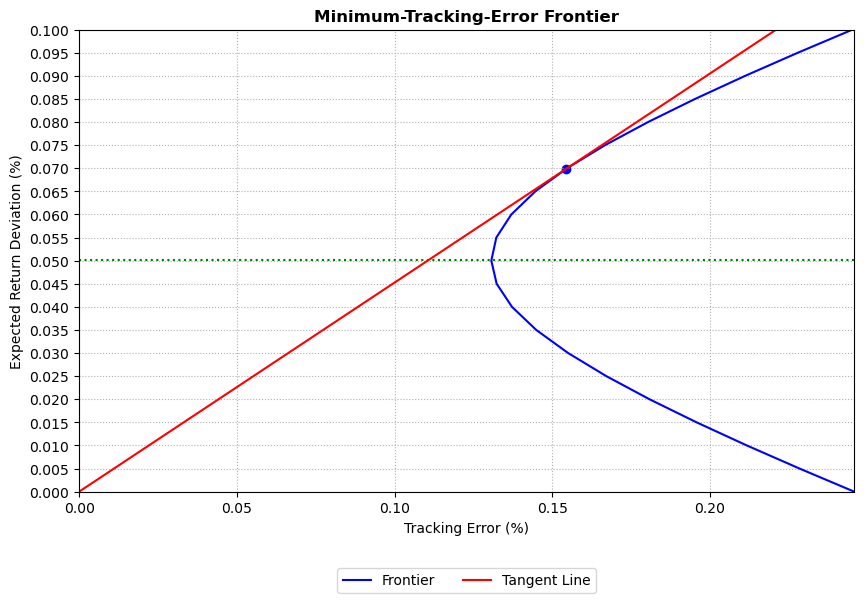

In [14]:
# Flatten Rp_range and std_dev to 1D arrays
Rp_range = Rp_range.flatten()
std_dev = std_dev.flatten()

# plt.scatter(std_dev[upper_half_indices], Rp_range[upper_half_indices], marker='o', color='blue')
plt.figure(figsize=(10, 6))
plt.plot(std_dev,
         Rp_range,
         color='blue',
         linestyle='-',
         label='Frontier')

# Draw a horizontal line at RMV
plt.axhline(y=RMV, color='green', linestyle='dotted')

# Find the index where the Information ratio is maximized (tangent point)
tangent_idx = np.argmax(information_ratio)
tangent_std_dev = std_dev[tangent_idx]
tangent_return = Rp_range[tangent_idx]

# Plot a linear line between using the information ratio as the slope
linear_line = Rf + information_ratio * CAL_x_axis
plt.plot(CAL_x_axis, linear_line, color='red', linestyle='-', label='Tangent Line')

# Plot the CAL tangent point
plt.scatter(std_dev_tg, Rtg, color='blue', marker='o')
plt.annotate(f'Tangent \n{round(std_dev_tg.item(),2),round(Rtg.item(),2)}'
             , (std_dev_tg-0.4, Rtg)
             , ha='center'
             , fontsize=8
             , weight='bold')

# Set labels and title
plt.xlabel('Tracking Error (%)')
plt.ylabel('Expected Return Deviation (%)')

# Set the Y-axis ticks with an increment of 0.005
plt.yticks(np.arange(0, max(Rp_range) + 0.005, 0.005))

# Set the X-axis ticks with an increment of 0.1
plt.xticks()

# Set the X-axis limits to start from 0
plt.xlim(0, max(std_dev))  # Adjust the upper limit as needed
plt.ylim(0, max(Rp_range))  # Adjust the upper limit as needed
plt.title("Minimum-Tracking-Error Frontier", fontsize=12, fontweight='bold')

# Show the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjust the position and number of columns
plt.grid(True, linestyle='dotted')
plt.show()

## Part 2

### Simulating random portfolios data points
Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 105 data points.

Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

In [15]:
# Specify how many data points you want
data_points = 100000

# Extract number of portfolio weight
num_weight = len(portfolio_weight)

## with normalized W

 ### Generate 100000 random numbers representing portfolio weight , normalize it so that the random data for every industry will sum to 1, transpose the normalized data, calculate the mean

In [16]:
# Generate random numbers
random_data = np.random.rand(data_points,num_weight)

# Normalize each row of date to ensure the sum of each row is equal to one
normalized_portfolio_weight = random_data / random_data.sum(axis=1, keepdims=True)

# Transpose normalised data (portfolio weight)
transpose_portfolio_weight = normalized_portfolio_weight.T

# Multiply the random normalized portfolio weight with industry mean values.
mean_random_point = normalized_portfolio_weight * industry_mean.values

# Calculate the average return of the each random data point for 10 industry
portfolio_mean = np.mean(mean_random_point, axis=1)

# Initialize an empty list to store the results
results = []

# Iterate over the columns of transpose_portfolio_weight to calculate the standard deviance
for i in range(transpose_portfolio_weight.shape[1]):
    # Extract the i-th column as a 1x10 matrix
    transpose_column = transpose_portfolio_weight[:, i].reshape(1, -1) 
    # Extract the i-th column of normalized_portfolio_weight as a 10x1 matrix
    normalized_column = normalized_portfolio_weight[i,:].reshape(-1, 1)
    SD_random_point = np.sqrt(\
                        np.dot(\
                          np.dot(\
                             transpose_column, industry_covariance.values),\
                             normalized_column))
    results.append(SD_random_point)

# Flatten the list of arrays and remove the array wrapper
flat_SD_results = np.squeeze(results)

## Plot the portfolio mean with standard deviation. There is total 100000 data points.

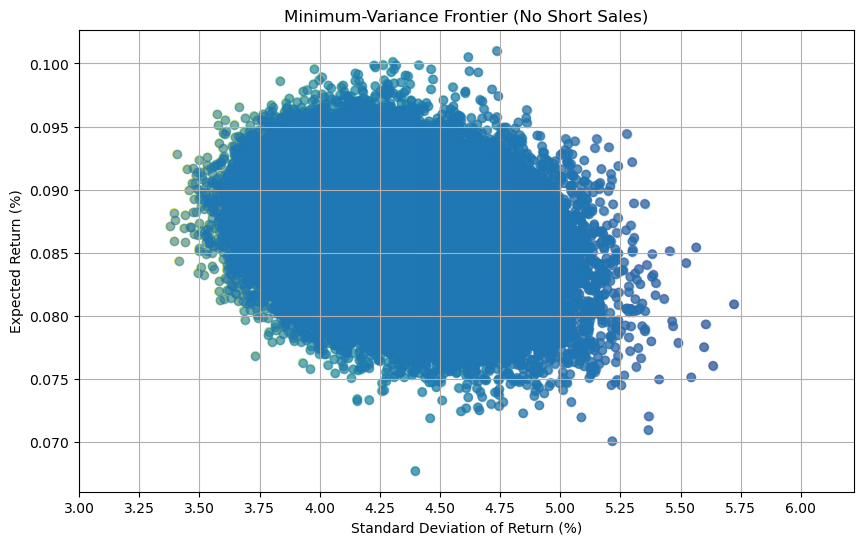

In [17]:
# Plot the scatter plot

colors = flat_SD_results 

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sc = plt.scatter(flat_SD_results, portfolio_mean, c=colors, cmap='viridis_r', alpha=0.5)

plt.scatter(flat_SD_results,portfolio_mean, alpha=0.5)  # alpha controls transparency of points
plt.xlabel('Standard Deviation of Return (%)')
plt.ylabel('Expected Return (%)')
plt.title('Minimum-Variance Frontier (No Short Sales)')
plt.grid(True)  # Add grid lines

# Set the X-axis ticks with an increment of 0.25
plt.xticks(np.arange(3, max(flat_SD_results) + 0.75, 0.25))

# Set the lower limit of the x-axis to 0
plt.xlim(3, max(flat_SD_results)+0.5)  # Replace 'max(flat_SD_results)' with the desired upper limit if needed


plt.show()

## Repeat the same step as above but now with 1/W normalized data

In [18]:
# Invert normalize each row of date to ensure the sum of each row is equal to one
invert_data = 1/ normalized_portfolio_weight
        
# Normalize each row by dividing by the row sum
row_sums = invert_data.sum(axis=1, keepdims=True)
inverted_normalized_portfolio_weight = invert_data / row_sums


# Transpose normalised data (portfolio weight)
transpose_inverted_portfolio_weight = inverted_normalized_portfolio_weight.T

# Processed data point
inverted_mean_random_point = inverted_normalized_portfolio_weight * industry_mean.values

inverted_portfolio_mean = np.mean(inverted_mean_random_point, axis=1)

# Initialize an empty list to store the results
inverted_results = []

# Iterate over the columns of transpose_portfolio_weight
for i in range(transpose_portfolio_weight.shape[1]):
    # Extract the i-th column as a 1x10 matrix
    inverted_transpose_column = transpose_inverted_portfolio_weight[:, i].reshape(1, -1)
    
    # Extract the i-th column of normalized_portfolio_weight as a 10x1 matrix
    inverted_normalized_column = inverted_normalized_portfolio_weight[i,:].reshape(-1, 1)
    
    # Perform your calculations for this pair of matrices
    # For example, calculate variance for this specific pair
    inverted_SD_random_point = np.sqrt(\
                        np.dot(\
                          np.dot(\
                             inverted_transpose_column, industry_covariance.values),\
                             inverted_normalized_column))
    
    # Append the result to the list
    inverted_results.append(inverted_SD_random_point)

# Flatten the list of arrays and remove the array wrapper
inverted_flat_SD_results = np.squeeze(inverted_results)

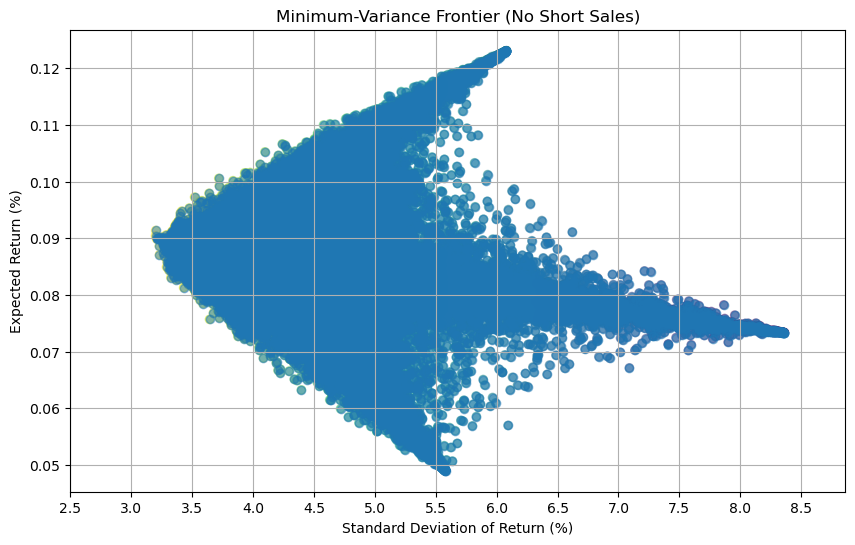

In [19]:
# Plot the scatter plot

colors = inverted_flat_SD_results 

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sc = plt.scatter(inverted_flat_SD_results, inverted_portfolio_mean, c=colors, cmap='viridis_r', alpha=0.5)



plt.scatter(inverted_flat_SD_results,inverted_portfolio_mean, alpha=0.5)  # alpha controls transparency of points
plt.xlabel('Standard Deviation of Return (%)')
plt.ylabel('Expected Return (%)')
plt.title('Minimum-Variance Frontier (No Short Sales)')
plt.grid(True)  # Add grid lines

# Set the X-axis ticks with an increment of 0.5
plt.xticks(np.arange(2.5, max(inverted_flat_SD_results) + 0.75, 0.5))

# Set the lower limit of the x-axis to 0
plt.xlim(2.5, max(inverted_flat_SD_results)+0.5)  # Replace 'max(flat_SD_results)' with the desired upper limit if needed


# # Add a colorbar
# cbar = plt.colorbar(sc)

plt.show()